In [1]:
import numpy as np
import QP_placer.input_data as input_data
import QP_placer.connection as connection
import QP_placer.placement as placement
import QP_placer.plot_gate_pin as plot_gate_pin
import QP_placer.assignment as assignment
import QP_placer.containment as containment

# 1. Input

In [2]:
file_name = 'data/toy1' # 输入文件名
# 从文件中读取：1，Gate，Net，Pad的个数，2.pin的坐标，3.一种特殊的数据结构用来存储连接关系
index_GNP, pin_index, nets_gatepad = input_data.input_data(file_name)

# 2. QP1

### 利用数据结构，得到pin和gate的连接矩阵B，gate之间的连接矩阵C
#### B和C都是coo matrix结构(稀疏矩阵)

In [3]:
B, C = connection.connection(index_GNP, nets_gatepad) # B[num_gate][num_pin]

### 求解gate的坐标

In [4]:
gate_index = placement.placement(index_GNP, B, C, pin_index)
gate_qp1 = gate_index

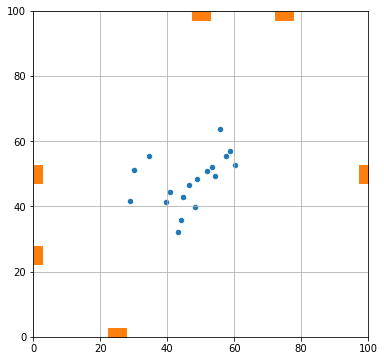

In [5]:
plot_gate_pin.plot_gate_pin(pin_index, gate_index)

# 3. Assignment:

In [6]:
[num_gate_left, num_gate_right] = assignment.assignment(index_GNP, gate_index)

# 4. Left‐side containment step:

In [7]:
sign = 'left'
[index_GNP_left, B_left, C_left, pin_index_left] =\
    containment.containment(sign, index_GNP, num_gate_left, num_gate_right, gate_index, pin_index, C, B)

# 5. QP2—Second Quadratic Placement:

In [8]:
gate_index_left = placement.placement(index_GNP_left, B_left, C_left, pin_index_left)

### 更新左侧的坐标

In [9]:
gate_index[:,num_gate_left] = gate_index_left

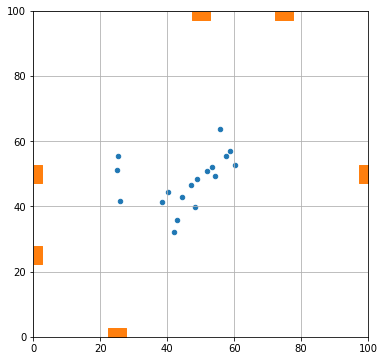

In [10]:
plot_gate_pin.plot_gate_pin(pin_index, gate_index)

# 6. Right--­side containment step:

In [11]:
sign = 'right'
[index_GNP_right, B_right, C_right, pin_index_right] = \
    containment.containment(sign, index_GNP, num_gate_left, num_gate_right, gate_index, pin_index, C, B)

# 7. QP3—Third Quadratic Placement:

In [12]:
gate_index_right = placement.placement(index_GNP_right, B_right, C_right, pin_index_right)

### 更新右侧的坐标

In [13]:
gate_index[:,num_gate_right] = gate_index_right

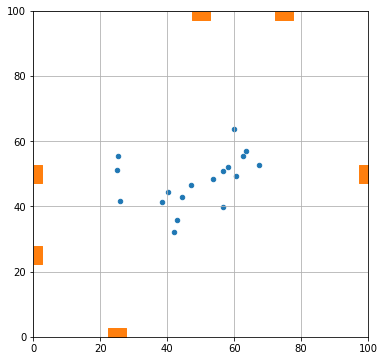

In [14]:
plot_gate_pin.plot_gate_pin(pin_index, gate_index)

# result

In [15]:
[G, N, P] = index_GNP
x_gate = gate_index[0]
y_gate = gate_index[1]

In [16]:
output = np.vstack((np.arange(G)+1, x_gate, y_gate)).T
np.savetxt('output.txt',output,fmt='%0.8f')